In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, KFold

import lightgbm

from pycaret.classification import *
import shap

from sklearn.metrics import f1_score, accuracy_score, classification_report




In [30]:
from function.data_engineering import *

In [31]:
data = pd.read_csv('penyisihan-satria-data-itb-2023/train.csv')
test = pd.read_csv('penyisihan-satria-data-itb-2023/test.csv')
data.index = data.id
test.index = test.id
data = data.iloc[:,1:]

In [32]:
or_cols = [c for c in data.columns if c != 'target']
int_cols = [c for c in data.columns if data[c].dtype=='int64' and c != 'target']
float_cols = [c for c in data.columns if data[c].dtype=='float64' and c != 'target']

In [33]:
# for c in int_cols:
#     print(c,data[c].value_counts())

In [34]:
# for c in float_cols:
#     print(c,data[c].value_counts())

In [35]:
# tmp_train = data.copy()
# for i in int_cols:
#     for c in int_cols:
#         tmp_train[f'{c}_binding_encoded'] = pd.cut(tmp_train[c], bins=5, labels=[1,2,3,4,5])

In [36]:
for col in int_cols:
  tmp_train = freq_encoding(data, col)
tmp_train

,hs,hst,hf,hc,hy,hr,b365h,b365d,bwh,bwd,iwh,iwd,psh,psd,whh,whd,vch,vcd,bb_mx_h,bb_av_h,bb_mx_d,bb_av_d,bb_ou,bb_mx_2_5,bb_av_2_5,bb_mx_2_5_1,bb_av_2_5_1,bb_ah,bb_a_hh,bb_mx_ahh,bb_av_ahh,bb_mx_aha,bb_av_aha,psch,pscd,target,hs_encode,hst_encode,hf_encode,hc_encode,hy_encode,hr_encode,bb_ou_encode,bb_ah_encode
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,23,6,7,10,2,0,1.95,3.50,1.91,3.50,1.90,3.50,1.93,3.59,1.85,3.50,1.95,3.50,2.02,1.94,3.60,3.48,37,2.13,2.05,1.85,1.78,22,-0.75,2.26,2.21,1.75,1.71,1.96,3.39,0,0.016667,0.108333,0.071667,0.075000,0.258333,0.955,0.070000,0.138333
2,21,5,5,8,1,0,1.28,6.50,1.26,6.00,1.27,5.80,1.30,6.14,1.29,6.00,1.29,6.00,1.32,1.28,6.50,5.90,35,1.56,1.52,2.63,2.53,20,-1.75,2.12,2.06,1.86,1.81,1.37,5.25,0,0.025000,0.136667,0.045000,0.091667,0.301667,0.955,0.140000,0.218333
3,17,6,8,7,1,0,1.28,6.50,1.28,5.75,1.33,5.50,1.27,6.08,1.25,6.00,1.29,6.00,1.33,1.27,6.50,5.94,34,1.55,1.51,2.70,2.52,23,-1.50,1.87,1.78,2.16,2.09,1.26,6.11,0,0.040000,0.108333,0.098333,0.108333,0.301667,0.955,0.146667,0.085000
4,26,11,12,6,1,0,1.90,3.79,1.83,3.75,1.90,3.50,1.91,3.72,1.91,3.75,1.90,3.75,1.98,1.89,3.90,3.67,38,1.85,1.76,2.15,2.06,19,-0.50,1.94,1.88,2.03,1.98,2.08,3.56,0,0.005000,0.025000,0.111667,0.110000,0.301667,0.955,0.053333,0.200000
5,20,6,11,3,3,0,2.50,3.20,2.50,3.10,2.50,3.10,2.52,3.17,2.50,3.10,2.50,3.20,2.57,2.47,3.20,3.10,33,2.51,2.39,1.62,1.57,20,-0.25,2.15,2.10,1.83,1.80,2.73,3.10,0,0.043333,0.108333,0.128333,0.113333,0.131667,0.955,0.161667,0.218333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,16,5,7,5,0,0,1.55,4.20,1.57,4.00,1.50,4.30,1.58,4.09,1.55,4.00,1.57,4.00,1.60,1.57,4.30,4.02,34,2.05,1.98,1.92,1.85,21,-1.00,2.05,1.98,1.95,1.89,1.53,4.35,1,0.070000,0.136667,0.071667,0.143333,0.248333,0.955,0.146667,0.183333
597,21,12,5,7,1,0,1.16,8.50,1.16,7.50,1.22,6.50,1.18,8.01,1.17,7.00,1.18,7.50,1.22,1.17,8.50,7.45,31,1.50,1.46,2.85,2.79,21,-2.00,1.91,1.84,2.08,2.02,1.15,9.75,1,0.025000,0.015000,0.045000,0.108333,0.301667,0.955,0.048333,0.183333
598,15,8,12,5,3,0,1.90,3.50,1.90,3.40,1.95,3.45,1.91,3.56,1.91,3.20,1.85,3.50,1.95,1.89,3.60,3.42,38,2.40,2.28,1.70,1.63,19,-0.50,1.91,1.86,2.07,2.01,1.89,3.51,1,0.076667,0.056667,0.111667,0.143333,0.131667,0.955,0.053333,0.200000


In [37]:
tmp_train[or_cols] = (tmp_train[or_cols] - tmp_train[or_cols].min())/tmp_train[or_cols].max()-tmp_train[or_cols].min()

In [38]:
exp_name = setup(data = tmp_train, target = 'target',fold=5)
exp_name

In [39]:
lr = create_model('lr')
tuned_lr = tune_model(lr)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:59:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7262,0.8005,0.7143,0.7317,0.7229,0.4524,0.4525
1,0.6905,0.7840,0.6429,0.7105,0.6750,0.3810,0.3827
2,0.7143,0.7789,0.6667,0.7368,0.7000,0.4286,0.4305
3,0.7024,0.7557,0.5714,0.7742,0.6575,0.4048,0.4194
4,0.7738,0.8481,0.7619,0.7805,0.7711,0.5476,0.5478
Mean,0.7214,0.7934,0.6714,0.7468,0.7053,0.4429,0.4466
Std,0.0288,0.0309,0.0646,0.0266,0.0397,0.0575,0.0554


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:00:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7381,0.8044,0.7381,0.7381,0.7381,0.4762,0.4762
1,0.6905,0.7868,0.6667,0.7000,0.6829,0.3810,0.3814
2,0.7143,0.7772,0.6667,0.7368,0.7000,0.4286,0.4305
3,0.6786,0.7619,0.5714,0.7273,0.6400,0.3571,0.3656
4,0.7738,0.8413,0.7619,0.7805,0.7711,0.5476,0.5478
Mean,0.7190,0.7943,0.6810,0.7365,0.7064,0.4381,0.4403
Std,0.0342,0.0272,0.0667,0.0259,0.0451,0.0683,0.0663


Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

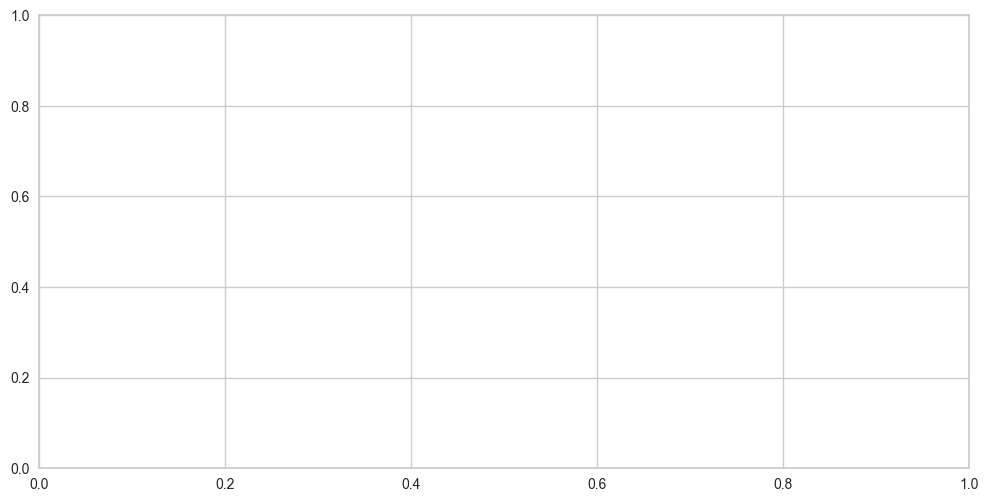

In [40]:
evaluate_model(tuned_lr)

In [41]:
top = compare_models(n_select = 3)
blender = blend_models(top)
tuned_blender = tune_model(blender)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:00:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [ ]:
X = [c for c in tmp_train.columns if c != 'target']
train = tmp_train[X].copy()
predict_model(tuned_lr,train)

,hs,hst,hf,hc,hy,hr,b365h,b365d,bwh,bwd,...,hs_encode,hst_encode,hf_encode,hc_encode,hy_encode,hr_encode,bb_ou_encode,bb_ah_encode,prediction_label,prediction_score
id,,,,,,,,,,,,,,,,,,,,,
1,-1.416667,0.400000,-1.782609,0.555556,0.333333,0.0,-1.021304,-2.970588,-1.009048,-2.857143,...,0.016667,0.108333,0.071667,0.075000,0.258333,0.955,0.070000,0.138333,0,0.5379
2,-1.472222,0.333333,-1.869565,0.444444,0.166667,0.0,-1.050435,-2.794118,-1.040000,-2.678571,...,0.025000,0.136667,0.045000,0.091667,0.301667,0.955,0.140000,0.218333,1,0.8182
3,-1.583333,0.400000,-1.739130,0.388889,0.166667,0.0,-1.050435,-2.794118,-1.039048,-2.696429,...,0.040000,0.108333,0.098333,0.108333,0.301667,0.955,0.146667,0.085000,1,0.8447
4,-1.333333,0.733333,-1.565217,0.333333,0.166667,0.0,-1.023478,-2.953529,-1.012857,-2.839286,...,0.005000,0.025000,0.111667,0.110000,0.301667,0.955,0.053333,0.200000,1,0.6855
5,-1.500000,0.400000,-1.608696,0.166667,0.500000,0.0,-0.997391,-2.988235,-0.980952,-2.885714,...,0.043333,0.108333,0.128333,0.113333,0.131667,0.955,0.161667,0.218333,0,0.5026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,-1.611111,0.333333,-1.782609,0.277778,0.000000,0.0,-1.038696,-2.929412,-1.025238,-2.821429,...,0.070000,0.136667,0.071667,0.143333,0.248333,0.955,0.146667,0.183333,1,0.7305
597,-1.472222,0.800000,-1.869565,0.388889,0.166667,0.0,-1.055652,-2.676471,-1.044762,-2.571429,...,0.025000,0.015000,0.045000,0.108333,0.301667,0.955,0.048333,0.183333,1,0.9621
598,-1.638889,0.533333,-1.565217,0.277778,0.500000,0.0,-1.023478,-2.970588,-1.009524,-2.864286,...,0.076667,0.056667,0.111667,0.143333,0.131667,0.955,0.053333,0.200000,1,0.6243


In [ ]:
# save_model(tuned_lr,model_name='lr-tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['hs', 'hst', 'hf', 'hc', 'hy',
                                              'hr', 'b365h', 'b365d', 'bwh',
                                              'bwd', 'iwh', 'iwd', 'psh', 'psd',
                                              'whh', 'whd', 'vch', 'vcd',
                                              'bb_mx_h', 'bb_av_h', 'bb_mx_d',
                                              'bb_av_d', 'bb_ou', 'bb_mx_2_5',
                                              'bb_av_2_5', 'bb_mx_2_...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
              